In [1]:
from Dataloader import CroppedProposalDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

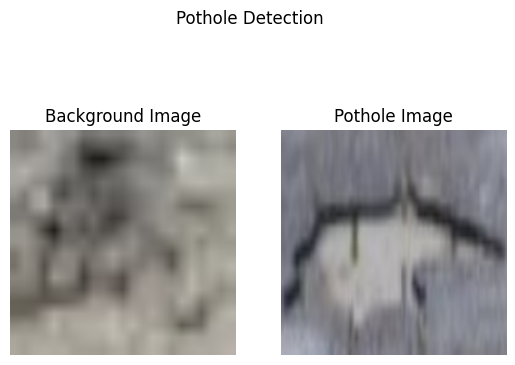

In [2]:
trainset = CroppedProposalDataset(mode='train')

trainloader = DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2)

# Define flags outside the loop
positive = False
negative = False

# Set up the plot
fig = plt.figure()
fig.suptitle("Pothole Detection")


for i, (image, label) in enumerate(trainloader):

    # Convert label to an integer
    label = label.item()

    # Display the first background and pothole images with titles
    if label == 0 and not negative:
        plt.subplot(1, 2, 1)
        plt.title("Background Image")
        plt.imshow(image[0].permute(1, 2, 0))
        plt.axis('off')
        negative = True
    elif label == 1 and not positive:
        plt.subplot(1, 2, 2)
        plt.title("Pothole Image")
        plt.imshow(image[0].permute(1, 2, 0))
        plt.axis('off')
        positive = True

    # Display the plot once both images are found
    if negative and positive:
        plt.show()
        break

